In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 模擬版資料做SVM

In [2]:
x = np.array([[6,6],[10,8],[3,7],[8,7]])

In [3]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

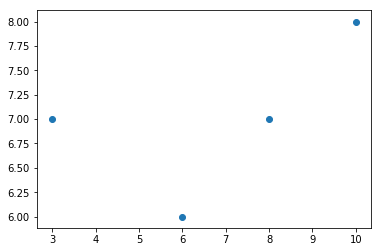

In [4]:
# SCATTER(X,Y) x[:,0]>所有的第一行,x[:,1]>所有的第二行
plt.scatter(x[:,0],x[:,1])

In [5]:
y = np.array([1,2,1,2])

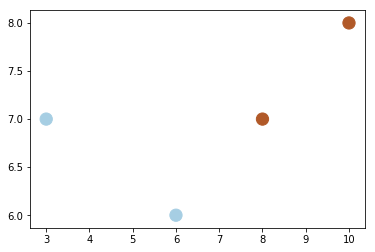

In [8]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired',s=150)

### step 1. 打開函數學習機

In [9]:
from sklearn.svm import SVC

In [12]:
clf = SVC(gamma='auto')

### step 2.學習

In [13]:
#告訴機器輸入x輸出y
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### step 3.預測

In [14]:
y_predict = clf.predict(x)

In [15]:
y_predict

array([1, 2, 1, 2])

In [16]:
y

array([1, 2, 1, 2])

In [19]:
# np.random.rand(100):0-1，x:3-10，y:6-8
xr = np.random.rand(100)*7+3
yr = np.random.rand(100)*2+6

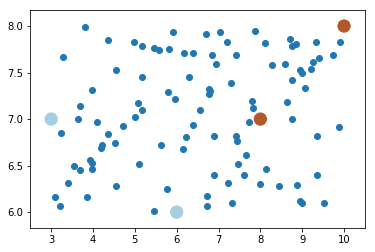

In [21]:
plt.scatter(xr,yr)
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired',s=150)

In [22]:
print('X',xr[:5])
print('Y',yr[:5])

X [7.43588701 3.2268899  5.45249417 9.34949747 5.17527055]
Y [6.76342215 6.84901488 6.00954006 6.82000181 7.78148485]


In [23]:
#np.c_是按行連線兩個矩陣，就是把兩矩陣左右相加，要求行數相等
X = np.c_[xr,yr]

In [24]:
Y = clf.predict(X)

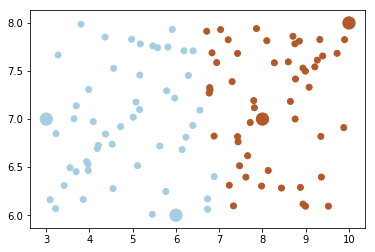

In [25]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired',s=150)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Paired')

### 結果呈現

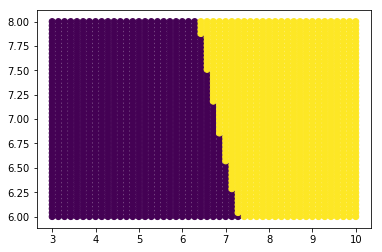

In [29]:
# ravel:拉平，返回一個連續的展平的(一維)陣列
x_list = np.linspace(3,10,50)
y_list = np.linspace(6,8,50)
X,Y = np.meshgrid(x_list,y_list)
P = np.c_[X.ravel(),Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0],P[:,1],c=C)

## 插播contour用法:畫出等高線

In [30]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X,Y = np.meshgrid(xL,yL)

In [32]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [33]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [38]:
#產出data為1或2的4組4個DATA的ARRAY
Z = np.random.randint(1,3,(4,4))
Z

array([[1, 2, 2, 2],
       [2, 2, 1, 1],
       [2, 1, 1, 1],
       [1, 2, 2, 2]])

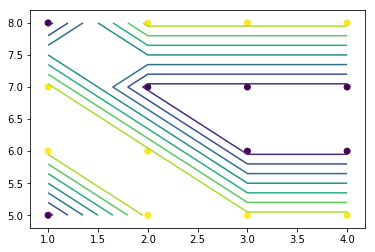

In [40]:
plt.contour(X,Y,Z)
#自動產出兩線之間的線段
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

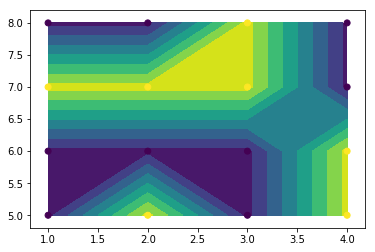

In [42]:
Z = np.random.randint(1,3,(4,4))
plt.contourf(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

## 資料視覺化終極版

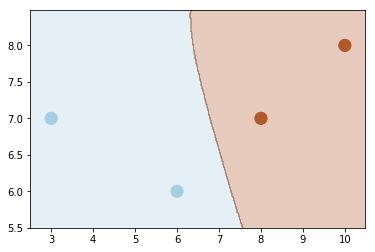

In [49]:
x_arr = np.arange(2.5,10.5,0.02)
y_arr = np.arange(5.5,8.5,0.02)
X,Y = np.meshgrid(x_arr,y_arr)
P = np.c_[X.ravel(),Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)

plt.contourf(X,Y,Z,cmap='Paired',alpha = 0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired',s=150)

## 鳶尾花數據庫

In [62]:
from sklearn.datasets import load_iris

In [63]:
iris = load_iris()

In [64]:
#解釋數據庫內容
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [65]:
x = iris.data
y = iris.target

In [66]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [67]:
y[:5]

array([0, 0, 0, 0, 0])

In [70]:
#每一列都要只要前兩行
X = x[:,:2]
Y = y

In [71]:
len(X)

150

### 區分訓練資料、測試資料

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

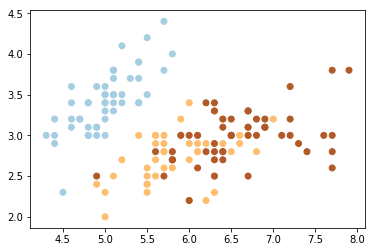

In [74]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Paired')

In [76]:
1.
clf = SVC(gamma='auto')

In [77]:
2.
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
3.
y_predict = clf.predict(x_test)

In [79]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [80]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [81]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

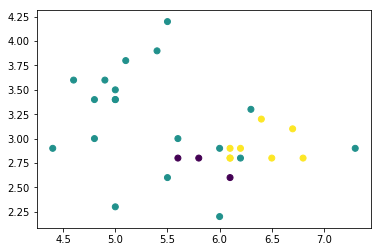

In [83]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test)

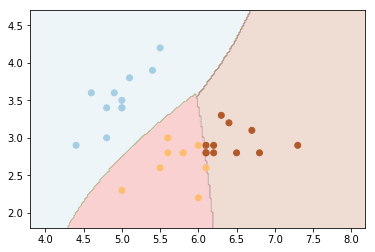

In [87]:
x0 = np.arange(3.8,8.2,0.02)
y0 = np.arange(1.8,4.7,0.02)

xm,ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z,cmap='Paired',alpha=0.2)

plt.scatter(x_test[:,0],x_test[:,1],cmap="Paired",c=y_predict)